In [1]:
import dlsfunctions as dls
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd

In [3]:
r = 2.24e-9 
diameter = r*2
sigma = 2e-10
c = 1

m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1



d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)
time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [4]:
theta_input = np.append(f_1, beta)

In [8]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)

In [25]:
ndim = 21
nwalkers = 150
nsteps = 4000

In [26]:
start_pos = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [27]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, sim_data, m, gamma, time_in))

In [28]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

emcee: Exception while calling your likelihood function:
  params: [6.25585983e+07 8.81348073e+06 1.26119316e+07 1.51737337e+07
 1.31904694e+07 2.90409688e+07 5.39415201e+06 1.33088644e+06
 2.53199343e+08 1.83462829e+09 7.17320320e+06 9.35972322e+07
 1.41520008e+07 1.79682434e+07 9.49120204e+07 1.48966519e+06
 9.12036072e+07 1.87014353e+07 1.76094310e+07 1.98141081e+07
 1.51784712e+00]
  args: (array([5.00000000e-10, 9.47368421e-10, 1.39473684e-09, 1.84210526e-09,
       2.28947368e-09, 2.73684211e-09, 3.18421053e-09, 3.63157895e-09,
       4.07894737e-09, 4.52631579e-09, 4.97368421e-09, 5.42105263e-09,
       5.86842105e-09, 6.31578947e-09, 6.76315789e-09, 7.21052632e-09,
       7.65789474e-09, 8.10526316e-09, 8.55263158e-09, 9.00000000e-09]), array([9.82365447e-01, 8.98431231e-01, 8.21673739e-01, 7.51478867e-01,
       6.87285102e-01, 6.28579011e-01, 5.74891121e-01, 5.25792156e-01,
       4.80889588e-01, 4.39824492e-01, 4.02268664e-01, 3.67921993e-01,
       3.36510052e-01, 3.0778189

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "dlsfunctions.py", line 120, in log_posterior
    
  File "dlsfunctions.py", line 107, in log_likelihood
    def log_likelihood(theta, d, y, m, gamma, time):
  File "dlsfunctions.py", line 69, in g2
    expo = np.exp(-(gamma*time[i])/d)
KeyboardInterrupt


KeyboardInterrupt: 

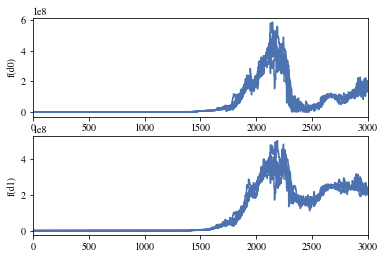

In [16]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

In [17]:
samples = sampler.chain[:,2900:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [18]:
q

,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,1.426978e+08,2.251808e+08,2.657984e+08,4.727951e+08,1.189335e+08,3.006921e+08,4.334939e+08,1.235496e+08,1.467489e+09,8.536240e+08,1.209857e+09,1.387065e+09,5.405303e+08,6.433650e+07,5.237635e+08,4.562657e+08,5.573247e+08,9.502983e+08,8.168358e+08,1.584312e+09
0.50,1.651792e+08,2.539077e+08,3.160773e+08,5.385268e+08,1.492042e+08,3.746932e+08,5.155289e+08,2.585239e+08,1.584174e+09,1.124482e+09,1.465301e+09,1.676275e+09,6.055601e+08,1.013501e+08,5.810328e+08,5.050778e+08,5.799343e+08,9.646733e+08,8.597063e+08,1.639242e+09
0.84,1.872617e+08,2.773995e+08,3.535416e+08,5.710906e+08,1.661069e+08,4.072293e+08,5.487642e+08,3.399952e+08,1.633964e+09,1.274405e+09,1.608091e+09,1.848529e+09,7.089124e+08,1.387053e+08,6.449394e+08,5.610978e+08,6.026530e+08,9.783747e+08,8.979932e+08,1.674553e+09


In [21]:
q_50 = q.quantile([0.5], axis=0)
q_50_array = q_50.values

In [22]:
q_50_array = q_50_array.flatten()

In [23]:
q_50_array.shape

(20,)

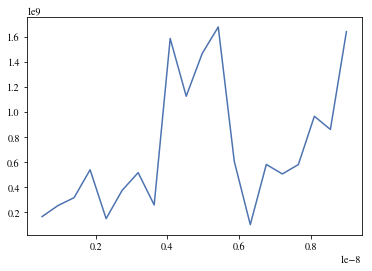

In [24]:
plt.plot(d, q_50_array)